# HIV_Data_Visualisation

In [2]:
## Importing important libraries

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rc('xtick', labelsize=12) 
matplotlib.rc('ytick', labelsize=30)
matplotlib.rcParams.update({'font.size': 28})
import math
import datetime as dt
import os
import sys

## Utility Functions

In [3]:

## Visulalization function 
def Visualize(dataset,List_of_count_to_print,title1,ylab,vx=50,vy=30,w=.80):
    df = dataset
    n = 0
    for i in List_of_count_to_print:
        filter1 = df['Country'] == i
        df = df[filter1]
        labels = df['Date']
        conf = df['Confirmed']
        Recov = df['Recovered']
        Death = df['Deaths']
        
        #high = max(conf)
        #low = min(conf)
        
        x = np.arange(len(labels))  # the x label locations 
        width = w  # the width of the bars
        fig, ax = plt.subplots(figsize=(vx,vy))
        rects1 = ax.bar(x - width, conf, width, label='confirmed')
        rects2 = ax.bar(x , Recov, width, label='Recovered')
        rects3 = ax.bar(x + width , Death, width, label='Death')

        # Add some text for labels, title and custom x-axis tick labels, etc.
        ax.set_ylabel(ylab)
        ax.set_title(title1)
        ax.set_xticks(x)
        plt.xticks(rotation=90) 
        #plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
        ax.set_xticklabels(labels)
        ax.legend()
        n  = n + 1
    
    
    plt.show()
    
## function to Check the List of Countries avaialable
def count_avalaible(dataframe,country_coul_rep = 'Country'):
    x = 0
    for i in set(dataframe.loc[:,country_coul_rep]):
        print(i,end=' | ')
        x = x + 1
        if(x > 6):
            x = 0
            print()
    print("\n\n##Total No of Countries = " + str(len(set(dataframe.loc[:,country_coul_rep]))))
    
    

## Loading HIV Data

In [4]:
HIV_Countires_Wise = pd.read_csv('../../HIV infected Population/Data_Extract_From_Health_Nutrition_and_Population_Statistics/c600116a-af72-4faa-945a-ab00ddddb96e_Data.csv')
HIV_Countires_Wise

,Series Name,Series Code,Country Name,Country Code,2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Adults (ages 15+) living with HIV,SH.DYN.AIDS,Afghanistan,AFG,6500,6900,..
1,Adults (ages 15+) living with HIV,SH.DYN.AIDS,Albania,ALB,..,..,..
2,Adults (ages 15+) living with HIV,SH.DYN.AIDS,Algeria,DZA,14000,15000,..
3,Adults (ages 15+) living with HIV,SH.DYN.AIDS,American Samoa,ASM,..,..,..
4,Adults (ages 15+) living with HIV,SH.DYN.AIDS,Andorra,AND,..,..,..
...,...,...,...,...,...,...,...
259,NaN,NaN,NaN,NaN,NaN,NaN,NaN
260,NaN,NaN,NaN,NaN,NaN,NaN,NaN
261,NaN,NaN,NaN,NaN,NaN,NaN,NaN
262,Data from database: Health Nutrition and Popul...,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
## Check the List of Countries avaialable

## Columns renaming for Uniformity

HIV_Countires_Wise = HIV_Countires_Wise.dropna()

HIV_Countires_Wise = HIV_Countires_Wise.rename(columns={'Country Name': 'Country'})
count_avalaible(HIV_Countires_Wise,'Country')


Maldives | Belize | Kiribati | Lebanon | Other small states | Solomon Islands | North Macedonia | 
Burundi | Estonia | Moldova | Seychelles | Iceland | Myanmar | Indonesia | 
Latin America & the Caribbean (IDA & IBRD countries) | Singapore | Upper middle income | Uruguay | Brunei Darussalam | Bahamas, The | Denmark | 
Guam | Guatemala | Venezuela, RB | Euro area | Northern Mariana Islands | Namibia | Barbados | 
Chile | Arab World | Croatia | Korea, Rep. | Chad | Panama | Sri Lanka | 
Bosnia and Herzegovina | Zimbabwe | Sudan | Virgin Islands (U.S.) | Europe & Central Asia (excluding high income) | Bahrain | Channel Islands | 
Pakistan | Morocco | Senegal | Botswana | Guyana | Faroe Islands | Australia | 
Kosovo | Thailand | New Caledonia | Equatorial Guinea | Aruba | American Samoa | Bangladesh | 
Finland | Canada | Greenland | St. Kitts and Nevis | Malawi | Central Europe and the Baltics | Oman | 
Albania | Gibraltar | Middle East & North Africa (IDA & IBRD countries) | Uzbekistan | 

## Cleaning HIV DATA(Preprocessing)

In [6]:
## replacing nan/missing values with average and data not available for 2017-2019 droping the country
HIV_Countires_Wise = HIV_Countires_Wise.drop(['Series Name','Series Code'],axis=1)
avg = 0
print(HIV_Countires_Wise)
for i in range (len(HIV_Countires_Wise)):
    for j in range(len(HIV_Countires_Wise.iloc[i])):
        if(HIV_Countires_Wise.iloc[i][j] == ".."):
            HIV_Countires_Wise.iloc[i][j] = 0
    avg = ( int(HIV_Countires_Wise.iloc[i][2]) + int(HIV_Countires_Wise.iloc[i][3]) )/2 
    for j in range(len(HIV_Countires_Wise.iloc[i])):
        if(HIV_Countires_Wise.iloc[i][j] == 0):
            HIV_Countires_Wise.iloc[i][j] = str(int(avg))
HIV_Countires_Wise = HIV_Countires_Wise.replace('United States','US')
## Countires under consideration             
print(HIV_Countires_Wise[HIV_Countires_Wise['Country'] == 'India'])
print(HIV_Countires_Wise[HIV_Countires_Wise['Country'] == 'US'])
print(HIV_Countires_Wise[HIV_Countires_Wise['Country'] == 'United Kingdom'])
print(HIV_Countires_Wise[HIV_Countires_Wise['Country'] == 'South Africa'])
print(HIV_Countires_Wise[HIV_Countires_Wise['Country'] == 'Sweden'])
            
    


        
        
        

                Country Country Code 2017 [YR2017] 2018 [YR2018] 2019 [YR2019]
0           Afghanistan          AFG          6500          6900            ..
1               Albania          ALB            ..            ..            ..
2               Algeria          DZA         14000         15000            ..
3        American Samoa          ASM            ..            ..            ..
4               Andorra          AND            ..            ..            ..
..                  ...          ...           ...           ...           ...
254  West Bank and Gaza          PSE            ..            ..            ..
255               World          WLD      35400000      36200000            ..
256         Yemen, Rep.          YEM          9800         10000            ..
257              Zambia          ZMB       1100000       1200000            ..
258            Zimbabwe          ZWE       1200000       1200000            ..

[259 rows x 5 columns]
    Country Country Code 201

In [7]:

## Analysing the data Structure after Cleaning and Pre-processing 

Country_to_look_for = 'Vietnam'
ylab = "Population"
xlab = "Countries"

filter1 = HIV_Countires_Wise['Country'] == Country_to_look_for
HIV_Countires_Wise_country_specific = HIV_Countires_Wise[filter1]

#HIV_Countires_Wise_country_specific                
HIV_Countires_Wise  ## Uncomment this to view for all countires at once

,Country,Country Code,2017 [YR2017],2018 [YR2018],2019 [YR2019]
0,Afghanistan,AFG,6500,6900,6700
1,Albania,ALB,0,0,0
2,Algeria,DZA,14000,15000,14500
3,American Samoa,ASM,0,0,0
4,Andorra,AND,0,0,0
...,...,...,...,...,...
254,West Bank and Gaza,PSE,0,0,0
255,World,WLD,35400000,36200000,35800000
256,"Yemen, Rep.",YEM,9800,10000,9900
257,Zambia,ZMB,1100000,1200000,1150000


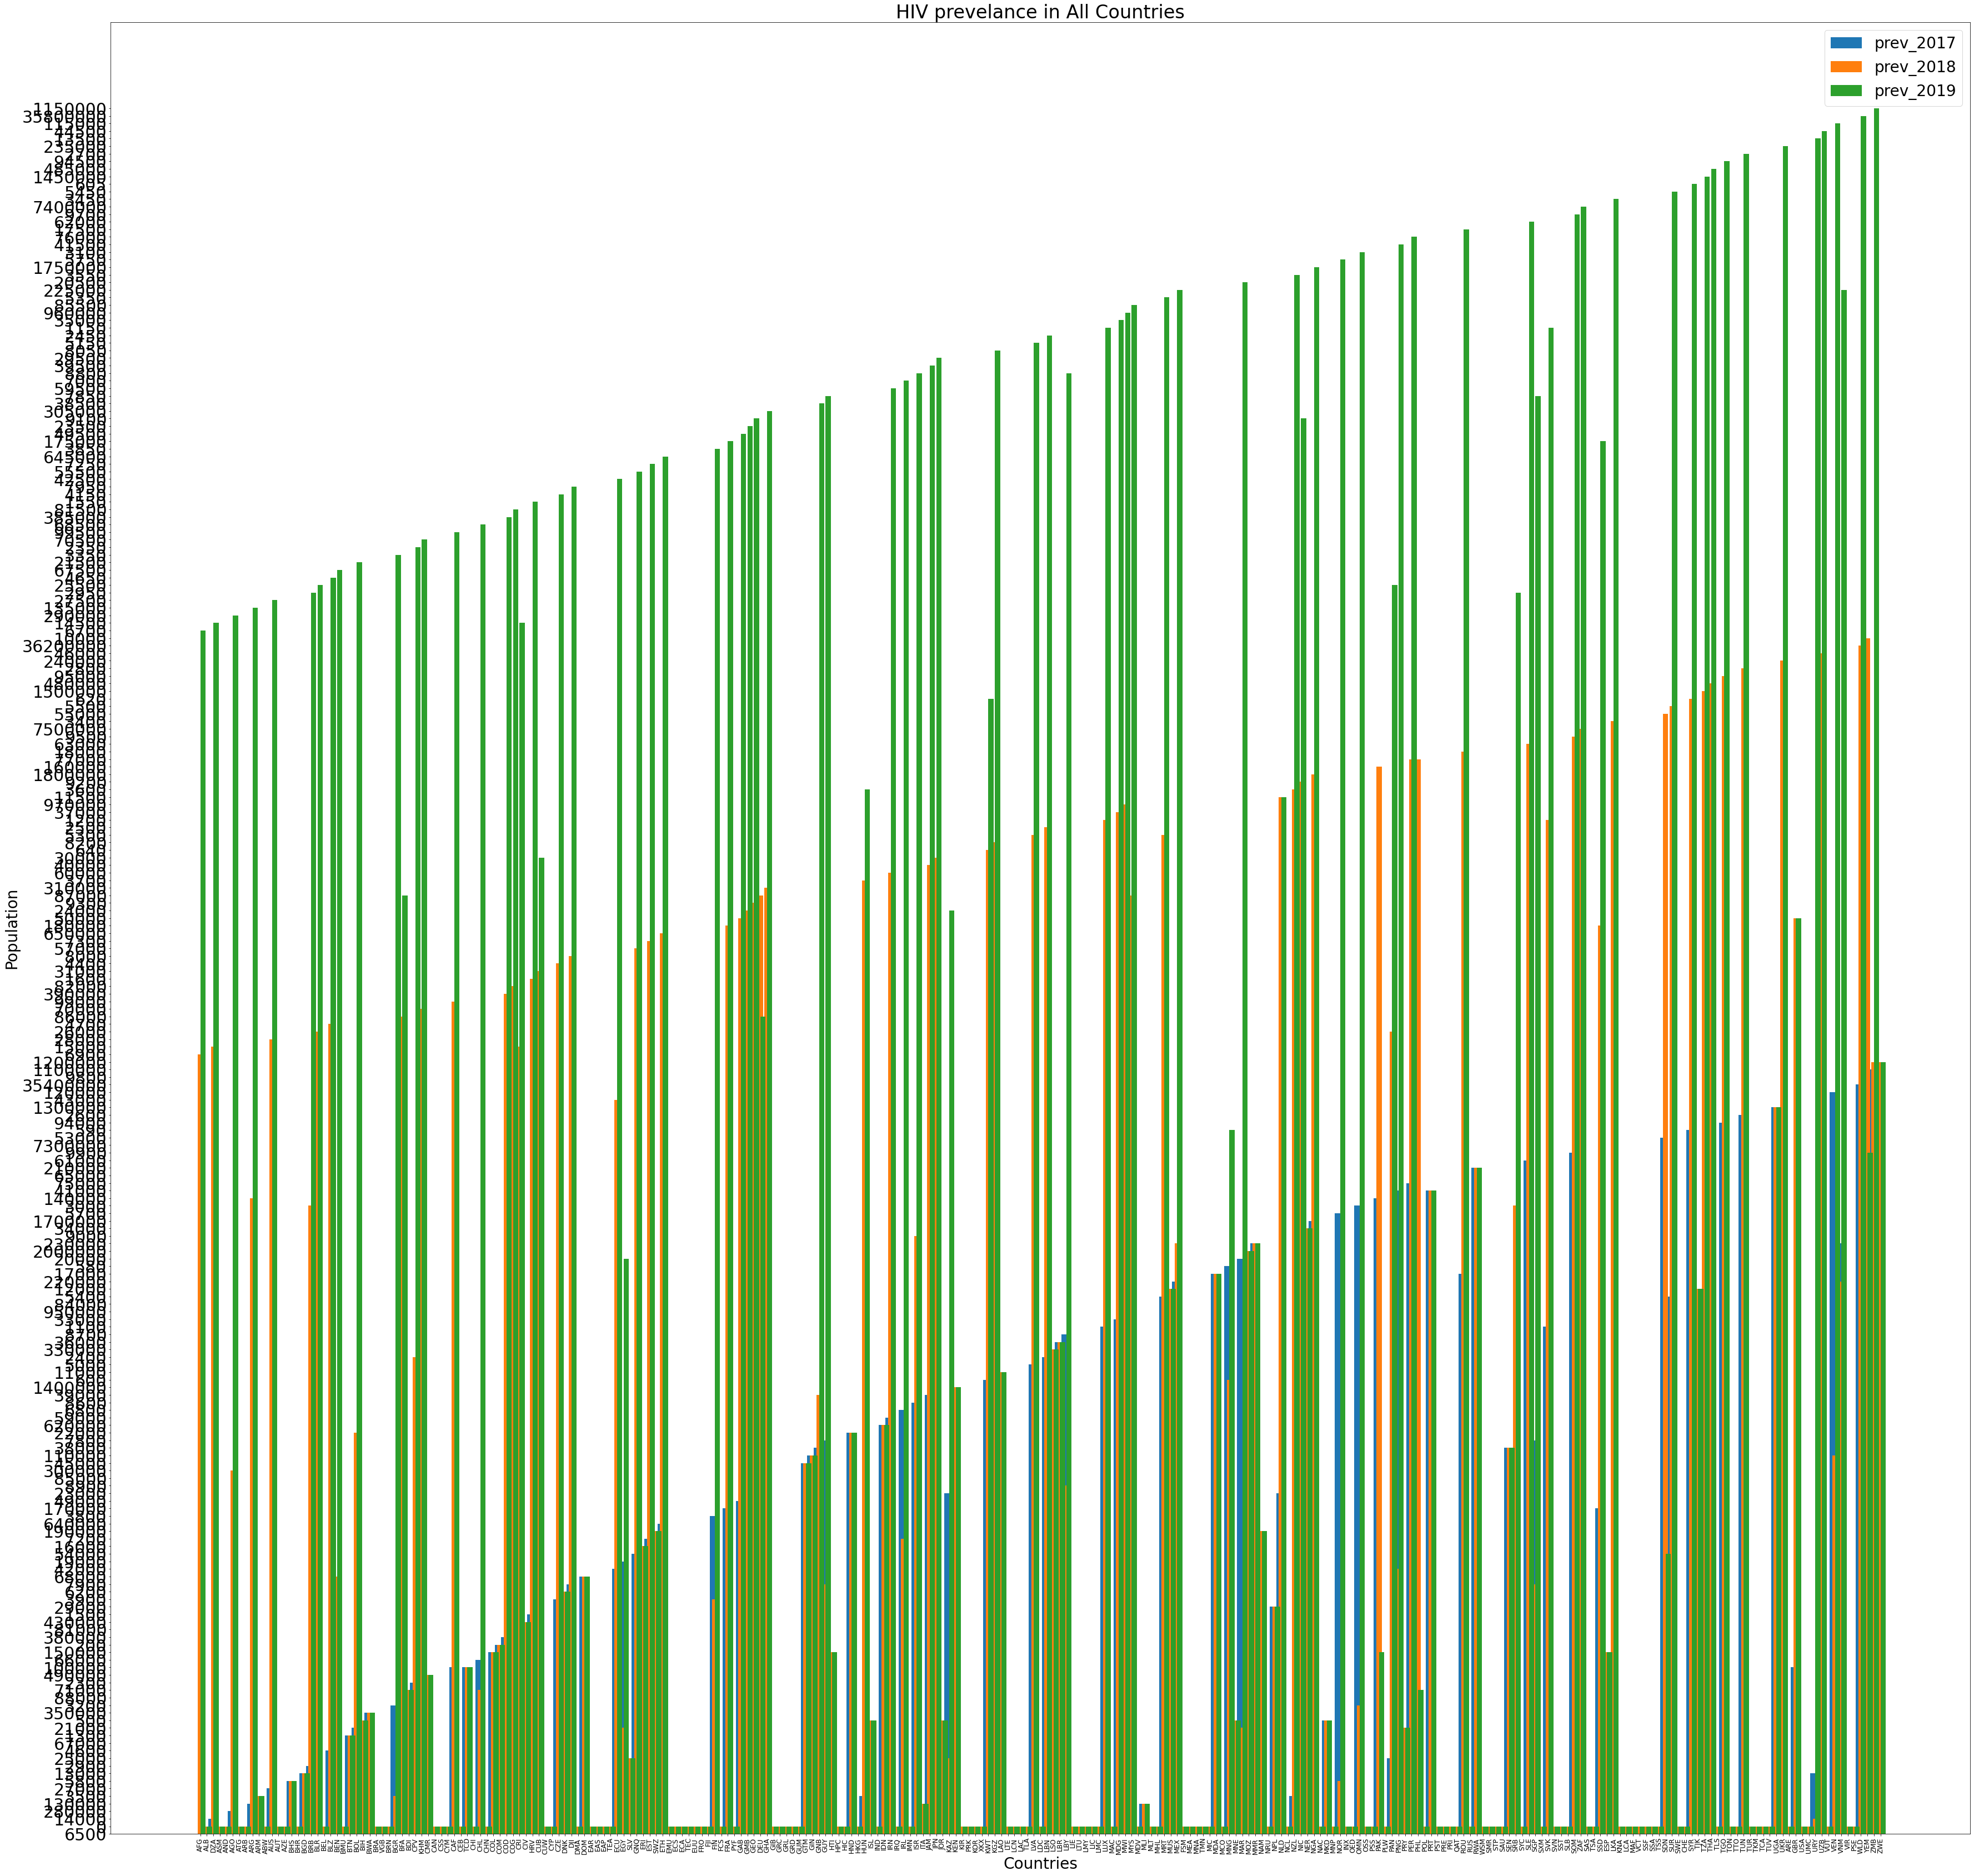

In [8]:
## Visualisation

df = HIV_Countires_Wise
        
    

labels = df['Country Code']
prev_2017 = df['2017 [YR2017]']
prev_2018 = df['2018 [YR2018]']
prev_2019 = df['2019 [YR2019]']
        
title1 = 'HIV prevelance in All Countries'
         
#high = int(max(prev_2018))
#low = 0  

x = np.arange(len(labels))  # the x label locations 
width = .80  # the width of the bars
fig, ax = plt.subplots(figsize=(60,60))
rects1 = ax.bar(x-width/2, prev_2017, width, label='prev_2017')
rects2 = ax.bar(x, prev_2018, width, label='prev_2018')
rects3 = ax.bar(x+width/2, prev_2019, width, label='prev_2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(ylab)
ax.set_xlabel(xlab)
ax.set_title(title1)
ax.set_xticks(x)
#ax.set_yticks(y)
plt.xticks(rotation=90) 
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.set_xticklabels(labels)
ax.legend()

    
    
plt.show()

In [15]:
## Column match

print('-----------------------------------------------------------------')

countries = ['Afghanistan','Italy' , 'Kuwait', 'India', 'South Africa' ,'US', 
             'United Kingdom','Sri Lanka', 'Chile' , 'Norway', 'New Zealand' ,'Switzerland', 
'Australia', 'Canada', 'China','Slovenia','North Macedonia']
k = 0

match = []
for i in set(HIV_Countires_Wise.loc[:,'Country']):
    if(i in countries):
        k +=1
        match.append(i)
        print(i)
        
print(k)
print("-------Not Matching --------------------")
for i in countries:
    if(i not in match ):
        print(i)

-----------------------------------------------------------------
North Macedonia
US
Chile
Sri Lanka
Australia
Canada
Slovenia
Kuwait
Norway
United Kingdom
Italy
India
New Zealand
China
Switzerland
Afghanistan
South Africa
17
-------Not Matching --------------------


##  Writing the cleaned data in Cleaned Folder

In [48]:
HIV_Countires_Wise.to_csv('../Pre_Processed_Data/HIV_Countires_Wise_Processed.csv')

## Visualisation After Cleaning 

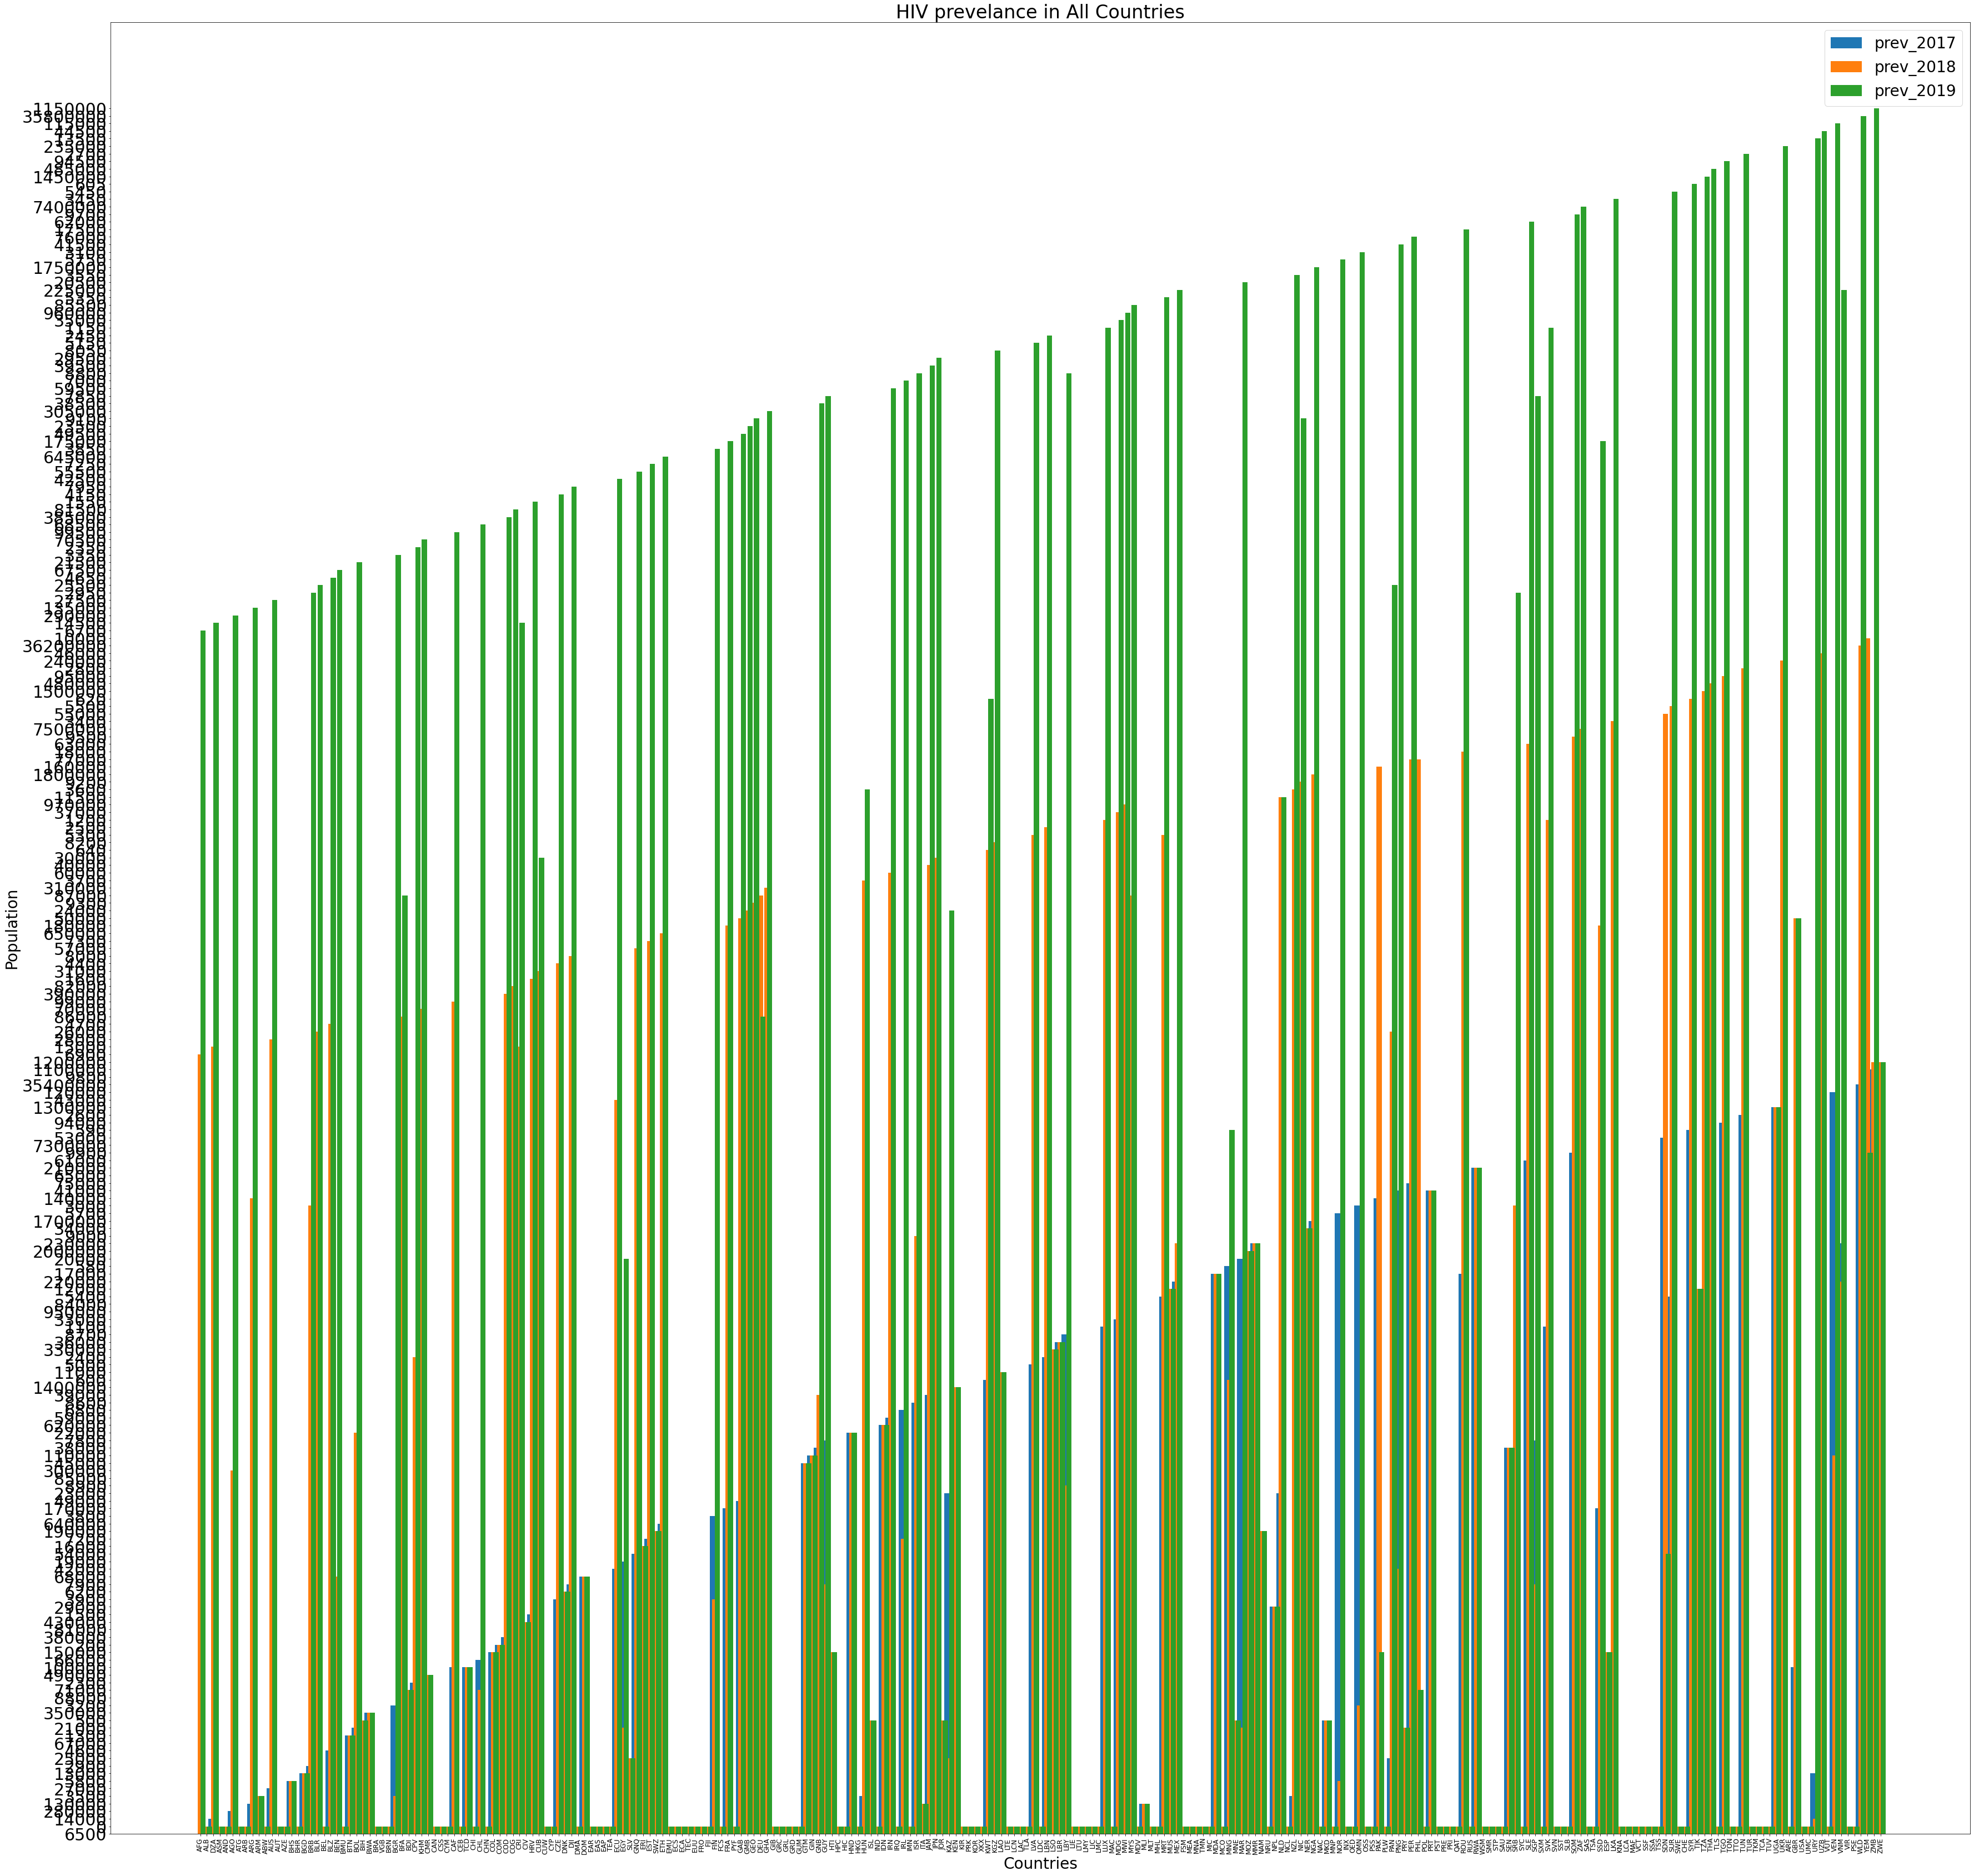

In [49]:
## Visualisation

df = HIV_Countires_Wise
        
    

labels = df['Country Code']
prev_2017 = df['2017 [YR2017]']
prev_2018 = df['2018 [YR2018]']
prev_2019 = df['2019 [YR2019]']
        
title1 = 'HIV prevelance in All Countries'
         
#high = int(max(prev_2018))
#low = 0  

x = np.arange(len(labels))  # the x label locations 
width = .80  # the width of the bars
fig, ax = plt.subplots(figsize=(60,60))
rects1 = ax.bar(x-width/2, prev_2017, width, label='prev_2017')
rects2 = ax.bar(x, prev_2018, width, label='prev_2018')
rects3 = ax.bar(x+width/2, prev_2019, width, label='prev_2019')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel(ylab)
ax.set_xlabel(xlab)
ax.set_title(title1)
ax.set_xticks(x)
#ax.set_yticks(y)
plt.xticks(rotation=90) 
#plt.ylim([math.ceil(low-0.5*(high-low)), math.ceil(high+0.5*(high-low))])
ax.set_xticklabels(labels)
ax.legend()

    
    
plt.show()